In [1]:
from random import choice

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from pandas import Series
from helper import StockHelper
from preproc import get_train_test_data


In [2]:
stocks = StockHelper.get_stock_symbol_mapping()
stock, symbol = choice(list(stocks.items()))


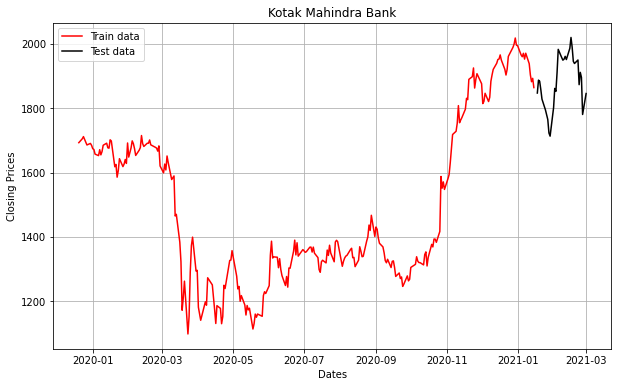

In [3]:
train_data, test_data = get_train_test_data(symbol)
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title(stock)
plt.xlabel("Dates")
plt.ylabel("Closing Prices")
plt.plot(train_data, "red", label="Train data")
plt.plot(test_data, "black", label="Test data")
plt.legend()


In [4]:
sc = StandardScaler()

In [5]:
window = 14

X = train_data
y = X.shift(-window)

X_train = X.values[:-window].reshape(-1, 1)
y_train = y.values[:-window].reshape(-1, 1)

X_train = sc.fit_transform(X_train)
y_train = sc.transform(y_train)


In [6]:

svr_rbf = SVR(kernel="rbf", C=1e6, gamma=0.01)
svr_rbf.fit(X_train, y_train)


/home/sarthak7gupta/.pyenv/versions/capstone/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1000000.0, gamma=0.01)

In [7]:
X = test_data
y = X.shift(-window)

X_test = X.values[:-window].reshape(-1, 1)
y_test = y.values[:-window].reshape(-1, 1)

X_test = sc.transform(X_test)
y_test = sc.transform(y_test)

In [8]:
predictions = sc.inverse_transform(svr_rbf.predict(X_test))
predictions = Series(predictions, index=test_data.index[:-window])

y_test = sc.inverse_transform(y_test)

predictions

date
2021-01-18    1894.793482
2021-01-19    1945.917350
2021-01-20    1941.882435
2021-01-21    1909.354562
2021-01-22    1868.350273
2021-01-25    1819.109403
2021-01-27    1774.119711
2021-01-28    1710.308531
2021-01-29    1695.369565
2021-02-01    1829.706077
2021-02-02    1913.949084
2021-02-03    1901.897177
2021-02-04    1971.825509
2021-02-05    2025.321712
2021-02-08    2011.761153
2021-02-09    2006.217331
dtype: float64

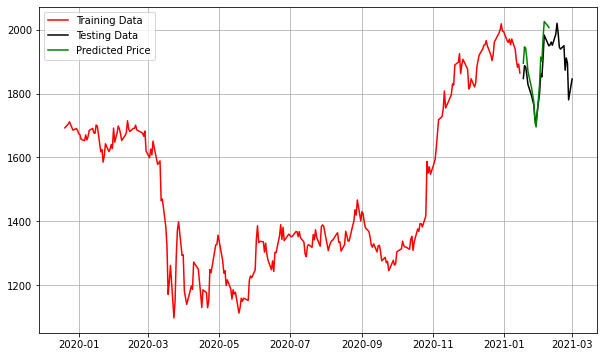

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_data, c="red", label="Training Data")
ax.plot(test_data, c="black", label="Testing Data")
ax.plot(predictions, c="green", label="Predicted Price")
ax.grid(True)
ax.legend()
plt.show()